# Exercises - 0
The following exercises are to assist in your understanding of the basic concepts in programming, and which concepts are important to this course.

### Variable names and Comments - PEP8
Good code consists of well named variable, and well explained code. If it's not obvious what a variable is, which can occur in mathematics when algorithms use the same variables as in papers, use a comment to explain what said variable is.
 Comments exist so other people, and yourself, can look at your code and understand what is happening. Every programmer at some point writes some code without comments. They then regret this decision when looking back in 3 weeks time, and curse their past selves. Be kind to future you, write good comments.

Python has a style guide called PEP8, found at https://www.python.org/dev/peps/pep-0008/.
These are guidelines and common practices. Every institution and project has its own guidelines. The most important rule is to make sure your code is readable, and consistent.
I will quote a couple of lines though:
- "Comments that contradict the code are worse than no comments"
- "Python coders from non-English speaking countries: please write your comments in English, unless you are 120% sure that the code will never be read by people who don't speak your language."

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import functools as func

In [25]:
# This is a block for testing
print(func.reduce(lambda x,y: x+y, [1,2], 0))
#Function reduce is now a skill I know,

3


## 1 - Basics

Here are a few basic exercises to begin. Some of them may be made easier by inbuilt functions in Python, Numpy, etc.

Below you are given a list
1. Iterate though this list and, in the following order:
    - Remove any odd number greater than 5.
    - Halve any even number

In [26]:
A = [12, 8, 9, 2, 18, 3, 15, 19, 6, 12, 15, 3, 20, 3, 13, 6, 1, 20, 13, 14]

#My code here
A = filter(lambda x:(x<5 or x%2==0), A)
A = map(lambda x: x//2 if (x%2==0) else x, A)
print(list(A))

[6, 4, 1, 9, 3, 3, 6, 3, 10, 3, 3, 1, 10, 7]


2. Using numpy, create the following two matrices
    $$ 
    A = \begin{bmatrix}
        6 & 4 & 2 & 0 & 4\\
        6 & 1 & 3 & 9 & 0\\
        2 & 1 & 8 & 6 & 7\\
        5 & 6 & 1 & 8 & 0\\
        1 & 7 & 7 & 9 & 0\\
    \end{bmatrix}
    \quad
    b = \begin{bmatrix}
    9 \\ 6 \\ 4 \\ 6 \\ 5
    \end{bmatrix}
    $$
    
    - What is the determinant of $A$?
    - Find the product $Ab$.

In [27]:
A = np.array([[6, 4, 2, 0, 4],
               [6, 1, 3, 9, 0],
               [2, 1, 8, 6, 7],
               [5, 6, 1, 8, 0],
               [1, 7, 7, 9, 0]])

b = np.array([9, 6, 4, 6, 5]).reshape(5,1)

print('A =\n{}'.format(A))
print('\n')
print('b =\n{}'.format(b))
print('\n')
print('determinant:\n{}'.format(np.linalg.det(A)))
print('\n')
print('Ab =\n{}'.format(A@b))

A =
[[6 4 2 0 4]
 [6 1 3 9 0]
 [2 1 8 6 7]
 [5 6 1 8 0]
 [1 7 7 9 0]]


b =
[[9]
 [6]
 [4]
 [6]
 [5]]


determinant:
13900.000000000002


Ab =
[[106]
 [126]
 [127]
 [133]
 [133]]


3. Plot the following functions using [matplotlib](https://matplotlib.org/):
    - $f(x) = \exp(x\% 4), \quad\ x\in(1,10).$
    - $g(x) = \sin(x)$ and $h(x) = \cos(x^2)$ on the same plot, for $x\in(-\pi, \pi)$.

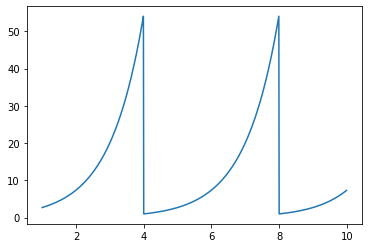

In [28]:
# YOUR CODE - f
ls = np.arange(1.0, 10.0, 0.01) #arithmetic progression of numbers from 1 to 10 with step 0.01
f = lambda x: np.exp(x%4)
plt.figure()
plt.plot(ls, f(ls))

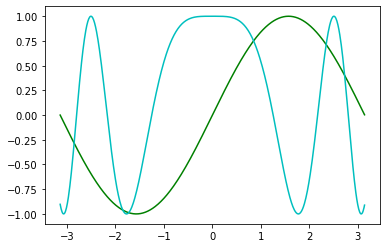

In [29]:
# YOUR CODE - g
ls = np.arange(-1*np.pi, np.pi, 0.01)
g = lambda x: np.sin(x)
h = lambda x: np.cos(x*x)
plt.figure()
plt.plot(ls, g(ls), 'g')
plt.plot(ls, h(ls), 'c')

## 2 - Root Finding
Below you will find a broken implementation of the [Secant method](https://en.wikipedia.org/wiki/Secant_method), whose purpose is to find the roots of a given function. You may have already encountered [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) for finding roots, an iterative method given by
    $$ x_{n+1} = x_n + \frac{f(x_n)}{f'(x_n)}. $$
This method can be found by replacing the derivative $f'(x_n)$, by it s finite difference. You will encounter finite differences later in the course. See also exercise 4 for the approximation of $f’(x)$ with a finite difference approximation.

Here, we note a few things.

- This is a great example of why functions are useful. When you want to find the roots of a polynomial using this method, if you didn't use a function you would have to rewrite this code, taking time and making the code less readable.
- The function below starts with a doc string. Always include a comment at the start of the function explaining what it does. You don't need to go in this much detail (I often don't) unless you intend to release the code publicly.


In [30]:
def secantMethod(f, x0, x1, maxIter=100, E=0.001):
    """
    Implemention of the Secant root finding method.

    --Parameters--
    f: Function
        Floats as input and output
    x0, x1: Floats
        Initial guesses
    maxIterations: Int
        Positive integer, max number of iterations for algorithm
    E: Float
        Convergence factor

    --Returns--
    float, approximation to root should the method converge
    """
    while maxIter>=0 and np.abs(x0 - x1) > E:
        x0, x1 = x1, x1 - f(x1) * (x1 - x0)/(f(x1) - f(x0))
        maxIter -= 1
        
    return x1

### Exercises
Consider the following functions
    $$f(t) = -6 + 11 t - 6 t^2 + t^3$$
    $$g(t)= t^2 + \exp(t) + \sin(t^3) -3$$
    
1. Debug the above code. There are 2 errors.
2. Using [matplotlib](https://matplotlib.org/), which has been imported for you below, plot the graphs of these two functions.
3. Use the secant method to find some roots of these two functions.
4. Alter the function above so it also returns the number of iterations in a tuple (root, iterations). How many iterations did it take to converge to a solution given your inputs?
5. Implement the secant method recursively, i.e. by calling itself within itself. Compare your results to the given implementation to ensure your implementation is working.


approximate zeros: 3.0, 1.0, 2.0000000025121114


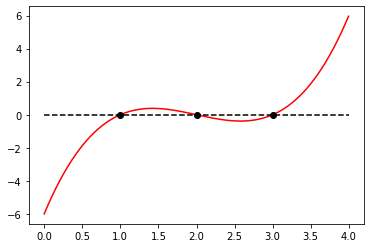

In [31]:
# YOUR CODE - f
f = lambda x: -6+11*x-6*x*x+x*x*x
aprf1 = secantMethod(f, 3, 4)
aprf2 = secantMethod(f, 0, 1)
aprf3 = secantMethod(f, 1.8, 1.9)

ls = lambda s,e: np.arange(s, e, (e-s)/1000)
i = ls(0,4)

plt.figure()
plt.plot(i, f(i), 'r')
plt.plot(i, list(map(lambda x: 0, i)), '--k')
plt.plot([aprf1, aprf2, aprf3], np.zeros(3), 'ok', )

print('\n' + 'approximate zeros: '+ str(aprf1) + ', ' + str(aprf2) + ', ' + str(aprf3))


approximate zeros: 0.7325359715644414, -1.5318111862229107


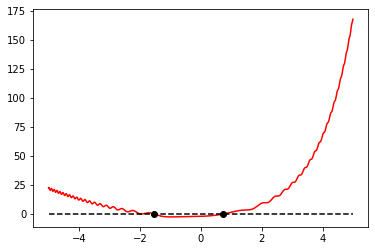

In [32]:
# YOUR CODE - g
g = lambda x: x*x+np.exp(x)+np.sin(x*x*x)-3
aprg1 = secantMethod(g, 0, 1)
aprg2 = secantMethod(g, 0, -1.8)

j = ls(-5, 5)

plt.figure()
plt.plot(j, g(j), 'r')
plt.plot(j, list(map(lambda x: 0, j)), '--k')
plt.plot([aprg1, aprg2], np.zeros(2), 'ok', )

print('\n' + 'approximate zeros: ' + str(aprg1) + ', ' + str(aprg2))

In [33]:
# YOUR CODE - Recursive Implementation
def recSecMet(f, x0, x1, maxLim = 100, E = 0.001):
    """
    Implemention of the Secant root finding method.

    --Parameters--
    f: Function
        Floats as input and output
    x0, x1: Floats
        Initial guesses
    maxIterations: Int
        Positive integer, max number of iterations for algorithm
    E: Float
        Convergence factor

    --Returns--
    float, approximation to root should the method converge
    """
    x0, x1 = x1, x1 - f(x1) * (x1 - x0)/(f(x1) - f(x0))
    if maxLim > 0 and np.abs(x0-x1)>E:
        return recSecMet(f, x0, x1, maxLim-1, E)
    else:
        return x1
    

In [34]:
works = "Works for {}? "

recAprf1 = recSecMet(f, 3, 4)
recAprf2 = recSecMet(f, 0, 0.8)
recAprf3 = recSecMet(f, 1.8, 1.9)

recAprg1 = recSecMet(g, 0, 1)
recAprg2 = recSecMet(g, 0, -1.8)

listf = [aprf1, aprf2, aprf3]
listg = [aprg1, aprg2]

recListf = [recAprf1, recAprf2, recAprf3]
recListg = [recAprg1, recAprg2]

Err = 0.001
checkf = map(lambda x, y: np.abs(x-y)<Err, listf, recListf)
checkg = map(lambda x, y: np.abs(x-y)<Err, listg, recListg)

print(works.format('f') + str(func.reduce(lambda x,y: x and y, checkf, True)))
print(works.format('g') + str(func.reduce(lambda x,y: x and y, checkg, True)))

Works for f? True
Works for g? True


## 3 - Numerical Solution to an ODE - Explicit Euler Method
Consider and ODE of the form
    $$ y'(x) = f(y(x)), \quad\ y(x_0) = y_0 $$
on the domain $[a,b]$.

To solve this numerically, we discretize the domain into $N+1$ equidistant points $x_0,...,x_N$ with $x_0, x_N = a,b$, then apply the following iterative relation
$$y_{n+1} = y_n + hf(y_n),$$
with $h=\frac{b-a}{N}$, and $y_0$ given above. This gives a set of points $y_0,...,y_N$ which are the numerical approximations to the solutions at $x_0,...,x_N$.

### Exercises
1. Implement this method, and apply it to the following two ODEs on the domain $[0,1]$ for $N = 10, 100, 1000$
    - $y'(x) = 4y(x),\quad\ y(0)=1$,
    - $y'(x) = y(x)\ln y(x),\quad\ y(0)=e$.
2. For each of these problems:
    - Plot the three solutions you obtained from the method on the same plot, as well as the actual solution.

In [41]:
# YOUR CODE - Your implementation
def explicitEulerMethod(f, y0, a, b, N):
    """
    Implemention of Eulers Method

    --Parameters--
    f: Function
        Floats as input and output
    y0: Float
        Initial value at a
    a,b: Floats
        Intervall start and end, respectively
    N: Int
        Numbers of steps to take


    --Side effects--
    Creates a plot of an approximation to the solution.
    
    --Returns--
    A NumPy-array of the x- and it's y-values.
    """
    h = (b-a)/N
    ys = [y0]
    for i in range(1,N+1):
        ys.append(ys[i-1]+h*f(ys[i-1]))
    
    xs = np.linspace(a,b,N+1)
    zs = np.array(ys)
    
    plt.figure()
    plt.plot(xs, ys, 'r')
    plt.plot([a,b], [0,0], '--k')
    
    return np.hstack((xs,zs)).reshape(2,N+1)

N = 10
N = 100
N = 1000


array([[0.00000000e+00, 1.00000000e-03, 2.00000000e-03, ...,
        9.98000000e-01, 9.99000000e-01, 1.00000000e+00],
       [1.00000000e+00, 1.00400000e+00, 1.00801600e+00, ...,
        5.37335314e+01, 5.39484655e+01, 5.41642594e+01]])

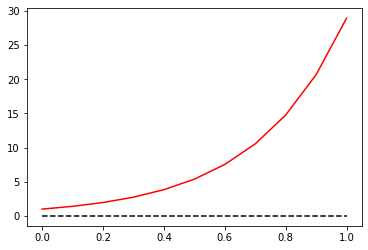

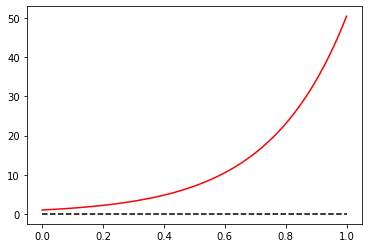

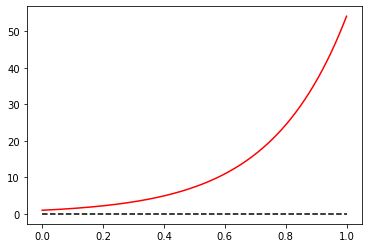

In [44]:
# YOUR CODE - ODE1
f = lambda y: 4*y

y0 = 1
a, b = 0, 1
N1, N2, N3 = 10, 100, 1000

print('N = {}'.format(N1))
explicitEulerMethod(f, y0, 0.0, 1.0, N1)

print('N = {}'.format(N2))
explicitEulerMethod(f, y0, 0, 1, N2)

print('N = {}'.format(N3))
explicitEulerMethod(f, y0, 0, 1, N3)

array([[0.00000000e+00, 1.00000000e-03, 2.00000000e-03, ...,
        9.98000000e-01, 9.99000000e-01, 1.00000000e+00],
       [2.71828183e+00, 2.72100011e+00, 2.72372383e+00, ...,
        1.50170319e+01, 1.50577158e+01, 1.50985506e+01]])

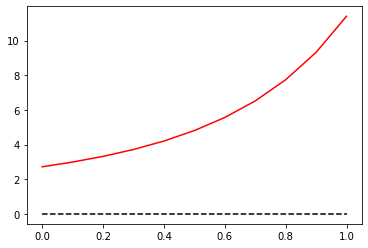

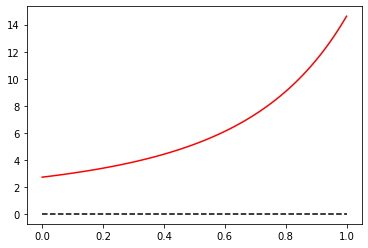

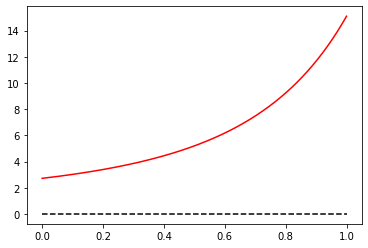

In [45]:
# YOUR CODE - ODE2
f = lambda y: y*np.log(y)

y0 = np.e
a, b = 0, 1
N1, N2, N3 = 10, 100, 1000

explicitEulerMethod(f, y0, 0.0, 1.0, N1)
explicitEulerMethod(f, y0, 0, 1, N2)
explicitEulerMethod(f, y0, 0, 1, N3)

## 4 - Propagation of rounding errors
The following exercise illustrates the effects of propagation of rounding errors in a numerical algorithm.

 
We want to make a simple programme to approximate the derivative of a differentiable function $f:\mathbb{R} \rightarrow \mathbb{R}$ and we use the simple approximation
$$f'(x)=\frac{f(x+\Delta x)-f(x)}{\Delta x}+\mathcal{O}(\Delta x),\qquad f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x}.$$
Use Taylor expansion to prove that the error given by this approximation is indeed $\mathcal{O}(\Delta x)$. 

### My answer here:

We want to have a Taylor expansion around the point $x$, and we also want to have $\Delta x$ as a variable. This gives the equation: $y+\Delta x - x = \Delta x$. Obviousky we get that $y = x$ solves this equation. Therefor we want to use $x + \Delta x$ as our variable in our expansion. We get that for some $c\in (x, x+\Delta x)$, the expansion is:

$$f(x+\Delta x) = f(x) + f'(x)(\Delta x) + \frac{f''(c)}{2}(\Delta x^2)$$ 

$$f'(x)\Delta x = f(x+\Delta x) - f(x) - \frac{f''(c)}{2}(\Delta x^2)$$

$$f'(x)=\frac{f(x+\Delta x)-f(x)}{\Delta x} - \frac{f''(c)}{2}(\Delta x)$$

$$\implies f'(x)=\frac{f(x+\Delta x)-f(x)}{\Delta x} + \mathcal{O}(\Delta x) \square$$

Take now $f(x)=\exp(x)$, and use the formula to approximate 
$$\left.\frac{d}{dx}\exp (x)\right|_{x=\frac{\pi}{4}}.$$
Compute the absolute error committed by the approximation for decreasing values of $\Delta x$, e.g $\Delta x=\frac{1}{2^k}$ for $k=1,2,\dots , N$, and try values of $N$ between $30$ and $40$.
Plot the results (values of $\Delta x$ versus the corresponding absolute error) in a logarithmic scale.

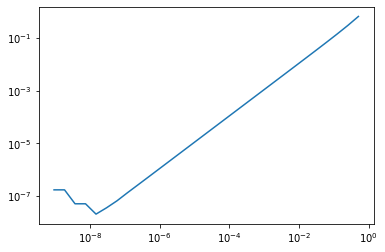

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define N first for example N=35
N=30
err = np.linspace(np.pi/4,np.pi/4,N+1, endpoint=False)
hh=np.arange(1,N+1)

#Write your code here. Store the values of h in hh. Store the values of the error in err.
#Make an appropriate for loop and use the function np.exp(x)

#LOOPS ARE REDUNDANT
createH = lambda n: 1/(2**n)

getErr = lambda x, h: -1*(np.exp(x)-(np.exp(x+h)-np.exp(x))/h)

hh = list(map(createH, hh))
err = list(map(getErr, err, hh))

#Plot the result in a logarithmic scale
plt.loglog(list(hh),list(err))

# There are some errors with the very small numbers. We can see that right before 10^-8 something gets unexpected big

Use now the Python module **decimal** (https://docs.python.org/2/library/decimal.html) to work with a prescribed precision in the floating-point representation of real numbers and in the floating point arithmetic in your code. For a precision of $p=7$ digits you should see the accumulation of rounding errors already for $N=12$. 

Choose $N=35$, how large should the precision $p$ be in order to remove the effects of accumulation of rounding errors from your plot? 

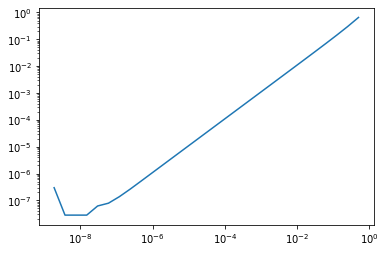

In [49]:
import numpy as np
import matplotlib.pyplot as plt
#The following command allows you to use decimal
from decimal import *
from math import pi
# Decide your precision, for example p=7 (low) or p=16 (high), with the following command:
getcontext().prec=16

N=30
hh= list(range(N))[1:]
err = [pi/4 for i in hh]

#To compute at a prescribed precision you should define your floating point numbers using Decimal. 
#Here is an example of how you use Decimal for obtaining the floating-point representation of $\sqrt{2}$ at the prescribed precision.
#sr2=Decimal(2).sqrt()
#print(sr2)

#Use here your code now redefining all floating point numbers incurring in the calculations using Decimal as shown above for the folating-point representation of $\sqrt{2}$.
#Replace the function np.exp(x) with Decimal(x).exp()

toDec = lambda x: Decimal(x)

err = list(map(toDec, err))
hh = list(map(toDec, hh))

#LOOPS ARE DEPRECATED
createH = lambda n: 1/(2**n)
getErr = lambda x, h: -1*(x.exp()-((x+h).exp()-(x).exp())/h)

hh = list(map(createH, hh))
err = list(map(getErr, err, hh))


#Finally, plot the results as before, you should be able to get rid of the accumulation of rounding error as long as you use enough digits of precision.
plt.loglog(hh,err)

#We can observe that the roundoff error is a little less significant over 10^-8